C:\Users\Acer\AppData\Local\Temp\ipykernel_2216\3544172447.py:9: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Date'] = pd.to_datetime(data['Date'])


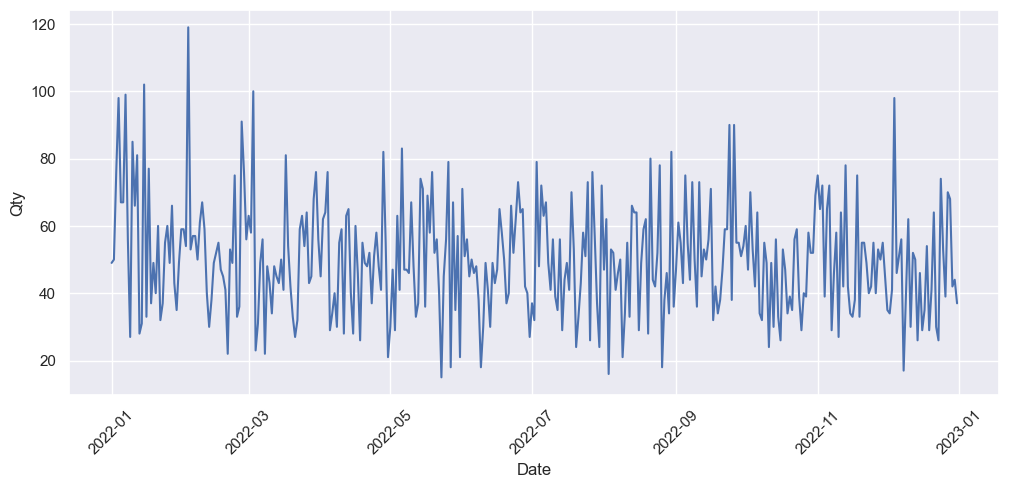

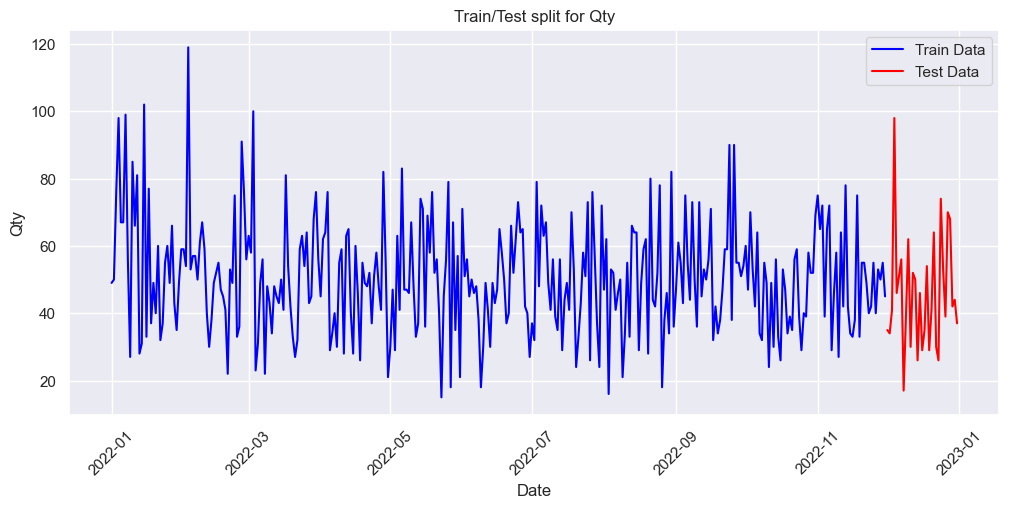

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

data = pd.read_csv('Case Study - Transaction.csv', delimiter=';')

data['Date'] = pd.to_datetime(data['Date'])
data['Qty'] = pd.to_numeric(data['Qty'], errors='coerce')
data = data.dropna(subset=['Qty'])

data_gabung = data.groupby('Date')['Qty'].sum().reset_index()

data_gabung.set_index('Date', inplace=True)

sns.set()
plt.figure(figsize=(12,5))
plt.ylabel('Qty')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.plot(data_gabung.index, data_gabung['Qty'])

train_data = data_gabung[data_gabung.index < "2022-12-01"]
test_data = data_gabung[data_gabung.index >= "2022-12-01"]

plt.figure(figsize=(12,5))
plt.plot(train_data, color = "blue", label='Train Data')
plt.plot(test_data, color = "red", label='Test Data')
plt.ylabel('Qty')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Qty")
plt.legend()
plt.show()


In [6]:
import numpy as np
import statsmodels.api as sm

# Fungsi untuk melakukan grid search dan mencari order ARIMA terbaik
def find_best_arima_order(data, p_range, d_range, q_range):
    best_aic = float("inf")
    best_order = None
    
    for p in p_range:
        for d in d_range:
            for q in q_range:
                order = (p, d, q)
                try:
                    model = sm.tsa.ARIMA(data, order=order)
                    results = model.fit(disp=-1)
                    aic = results.aic
                    if aic < best_aic:
                        best_aic = aic
                        best_order = order
                except:
                    continue
    
    return best_order

# Tentukan range nilai p, d, dan q yang akan dicoba
p_range = range(0, 5)   # Nilai p dapat diubah sesuai kebutuhan
d_range = range(0, 2)   # Biasanya d=0 atau d=1, karena sudah dilakukan differencing
q_range = range(0, 5)   # Nilai q dapat diubah sesuai kebutuhan

# Cari order ARIMA terbaik dari data training
train_data = data_gabung[data_gabung.index < "2022-12-01"]
best_order = find_best_arima_order(train_data, p_range, d_range, q_range)


C:\Users\Acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\l

In [7]:
print("Order ARIMA terbaik adalah:", best_order)

Order ARIMA terbaik adalah: None


In [5]:
# Buat model ARIMA dengan order terbaik
model = sm.tsa.ARIMA(train_data, order=(best_order[0], best_order[1], best_order[2]))
results = model.fit()

# Prediksi data pada periode test
start_date = "2022-12-01"
end_date = "2022-12-31"
predictions = results.predict(start=start_date, end=end_date, dynamic=True)

# Plot hasil prediksi
plt.figure(figsize=(12, 5))
plt.plot(train_data, label='Train Data')
plt.plot(test_data, label='Test Data')
plt.plot(predictions, label='Predictions', color='red')
plt.ylabel('Qty')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("ARIMA Model - Train vs Test Data")
plt.legend()
plt.show()

TypeError: 'NoneType' object is not subscriptable